- Programming Project 5 --Individual Project
- Yinzhe (Ricardo) Lu
- Programming with Python
- Dr. Kamesam
- Fall 2020

## 1. 

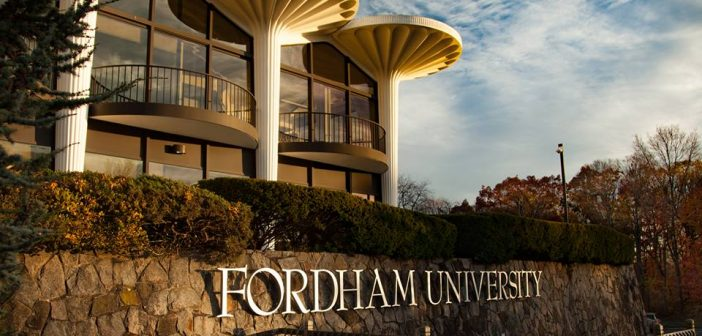

## 2. Download the data

## 3. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.precision', 2)

In [2]:
TSLA = pd.read_csv('TSLA.csv')

## 4.

In [3]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       129 non-null    object 
 1   Open       129 non-null    float64
 2   High       129 non-null    float64
 3   Low        129 non-null    float64
 4   Close      129 non-null    float64
 5   Adj Close  129 non-null    float64
 6   Volume     129 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
TSLA.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## 5. Are there any missing values in the Closing price column?
No. Since this data was all collected in the past, there is no missing value in the data frame. Neither has the Closing price column.

## 6.

In [5]:
TSLA.columns= TSLA.columns.str.lower().str.replace(" ","")

In [6]:
TSLA

,date,open,high,low,close,adjclose,volume
0,5/21/20,163.20,166.50,159.20,165.52,165.52,12231000
1,5/22/20,164.43,166.36,162.40,163.38,163.38,49937500
2,5/26/20,166.90,166.92,163.14,163.77,163.77,40448500
3,5/27/20,164.17,165.54,157.00,164.05,164.05,57747500
4,5/28/20,162.70,164.95,160.34,161.16,161.16,36278000
...,...,...,...,...,...,...,...
124,11/16/20,408.93,412.45,404.09,408.09,408.09,26838600
125,11/17/20,460.17,462.00,433.01,441.61,441.61,61188300
126,11/18/20,448.35,496.00,443.50,486.64,486.64,78044000
127,11/19/20,492.00,508.61,487.57,499.27,499.27,62475300


# 7.

In [7]:
TSLA.volume /= 1000

In [8]:
TSLA

,date,open,high,low,close,adjclose,volume
0,5/21/20,163.20,166.50,159.20,165.52,165.52,12231.0
1,5/22/20,164.43,166.36,162.40,163.38,163.38,49937.5
2,5/26/20,166.90,166.92,163.14,163.77,163.77,40448.5
3,5/27/20,164.17,165.54,157.00,164.05,164.05,57747.5
4,5/28/20,162.70,164.95,160.34,161.16,161.16,36278.0
...,...,...,...,...,...,...,...
124,11/16/20,408.93,412.45,404.09,408.09,408.09,26838.6
125,11/17/20,460.17,462.00,433.01,441.61,441.61,61188.3
126,11/18/20,448.35,496.00,443.50,486.64,486.64,78044.0
127,11/19/20,492.00,508.61,487.57,499.27,499.27,62475.3


## 8.

In [9]:
max_close = TSLA.close.max()

print("The highest closing price of the stock over the 6-month period is ", round(max_close,2))

The highest closing price of the stock over the 6-month period is  499.27


## 9.

In [10]:
index = TSLA['close'].argmax()
max_close_date = TSLA.loc[index,'date']

print("the date on which the highest closing price (previous question) was reached is ", max_close_date)

the date on which the highest closing price (previous question) was reached is  11/19/20


## 10. a.

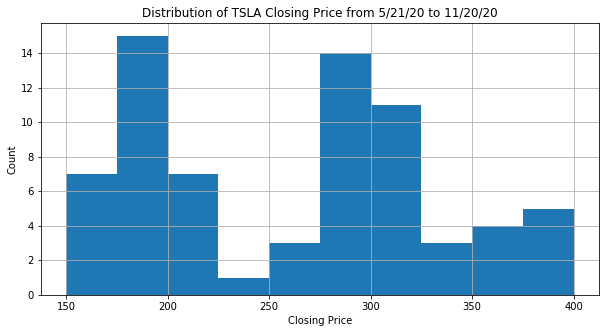

In [11]:
TSLA.hist( column = "close",bins = list(range(150,401,25)),figsize=(10,5))
plt.title("Distribution of TSLA Closing Price from 5/21/20 to 11/20/20")
plt.xlabel("Closing Price")
plt.ylabel("Count")
plt.show()

Most closing prices falls between 175 and 200, and between 275 and 300. This is not a standard distribution, but a distribution with two prominent peaks.

## 10.b.

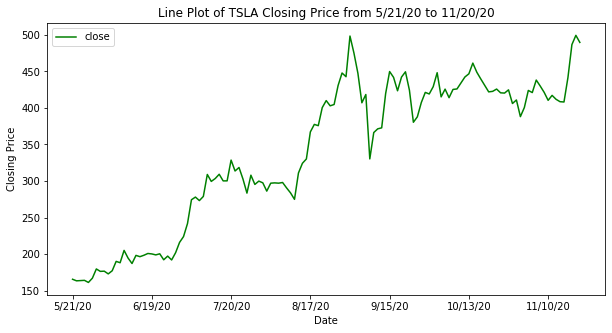

In [12]:
TSLA.plot(x = "date" , y ="close", kind = "line", figsize=(10,5), color="green",
          title="Line Plot of TSLA Closing Price from 5/21/20 to 11/20/20")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

Its stock value more than triples in half a year. The closing price of the stock TSLA increased throughout time with slight to medium fluctuations. It reached the peak above 450 twice in aroung August/September and 11/19/20. 

## 11.

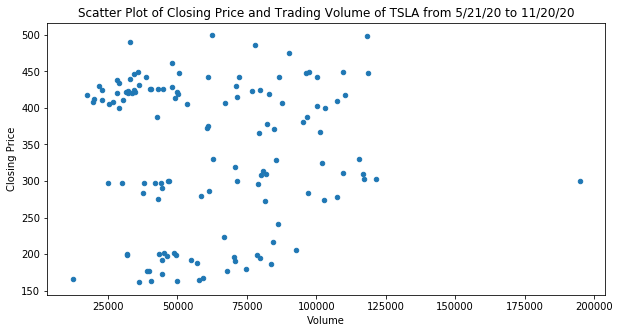

In [13]:
TSLA.plot(x="volume", y="close", kind ='scatter', figsize=(10,5),
          title ="Scatter Plot of Closing Price and Trading Volume of TSLA from 5/21/20 to 11/20/20")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.show()

I don't see any relationship between the closing price and trading volume.

## 12.

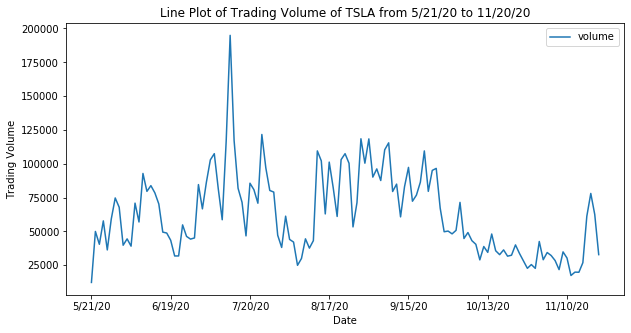

In [14]:
TSLA.plot(x="date", y="volume", kind ='line', figsize=(10,5),
          title ="Line Plot of Trading Volume of TSLA from 5/21/20 to 11/20/20")
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.show()

In [15]:
index = TSLA['volume'].argmax()
TSLA.loc[index,'date']

'7/13/20'

The trading volume reaches its peak at closing to 200000000 at 7/13/20. It mostly fluctuates between 25000000 and 125000000. 

## 13.

In [16]:
num_of_days = len(TSLA[TSLA["close"] >= 400])
print("The number of trading days on which the closing price is equal or above 400 is ",
     num_of_days)

The number of trading days on which the closing price is equal or above 400 is  59


## 14.

In [17]:
avg_volume = TSLA['volume'].mean()
print("The average trading volume over the 6-month period is ",round(avg_volume,2))

The average trading volume over the 6-month period is  62678.63


## 15.

In [18]:
TSLA_new = TSLA.loc[(TSLA["close"] > 300) & (TSLA["volume"] > avg_volume)]
TSLA_new.head()

,date,open,high,low,close,adjclose,volume
34,7/10/20,279.20,309.78,275.2,308.93,308.93,116688.0
36,7/14/20,311.20,318.00,286.2,303.36,303.36,117090.5
37,7/15/20,308.60,310.00,291.4,309.20,309.20,81839.0
38,7/16/20,295.43,306.34,293.2,300.13,300.13,71504.0
40,7/20/20,303.80,330.00,297.6,328.60,328.60,85607.0


# 16.

In [19]:
TSLA_new.to_excel("TSLA new.xlsx")

In [20]:
import datetime
import getpass
print("\n","Finished excution at ", datetime.datetime.now())
print(getpass.getuser())


 Finished excution at  2020-11-24 10:52:54.269064
ricardolu
